![Plum Logo](https://app.plumhq.com/images/plum_rebranded_logo.svg)

# Exploratory Data Analysis for Plum
### Insurance and Service providing company
---

Importing data into df pandas dataframe object.

In [1]:
import pandas as pd
df=pd.read_csv("PLUM_CSV.csv")
df.head(3)

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,08-04-2023 20:52,14-06-2023 16:30,09-04-2023 10:28,09-04-2023 10:28,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,24-04-2023 19:32,15-06-2023 16:37,25-04-2023 10:18,25-04-2023 10:18,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,16-05-2023 17:43,30-05-2023 14:56,16-05-2023 18:18,16-05-2023 18:18,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims


In [2]:
df.shape
# Number of rows and columns

(16476, 23)

In [3]:
df.columns
# Column names

Index(['Id', 'Requester id', 'Group', 'Status', 'Priority', 'Via',
       'Created at', 'Updated at', 'Assigned at', 'Initially assigned at',
       'Solved at', 'Resolution time', 'Satisfaction Score', 'Reopens',
       'Replies', 'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours',
       'Manual Tagging of Categories [list]'],
      dtype='object')

In [4]:
df.Group.unique()
# Unique departments handling tickets at PLUM

array(['Support', 'Reimbursement Claims', 'Onboardings', 'Endorsements'],
      dtype=object)

In [5]:
df.Status.unique()
# Unique types of status for a ticket

array(['Solved', 'Closed', 'Hold', 'Open', 'Pending', 'New'], dtype=object)

In [6]:
df.Status.value_counts()

Closed     12270
Solved      2139
Hold         790
Pending      681
Open         470
New          126
Name: Status, dtype: int64

In [7]:
df.Group.value_counts()
# Out of 16476 tickets - This is the Group wise breakdown across teams.

Endorsements            6449
Support                 5670
Reimbursement Claims    3827
Onboardings              530
Name: Group, dtype: int64

In [8]:
df.Id.nunique()
# primary key as every time a ticket is generated with a new id.

16476

In [9]:
df['Requester id'].nunique()
# There could be multiple customers who raise a ticket more than once.

6764

In [10]:
df.info()
# Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Id                                                      16476 non-null  int64  
 1   Requester id                                            16476 non-null  int64  
 2   Group                                                   16476 non-null  object 
 3   Status                                                  16476 non-null  object 
 4   Priority                                                16476 non-null  object 
 5   Via                                                     16476 non-null  object 
 6   Created at                                              16476 non-null  object 
 7   Updated at                                              16476 non-null  object 
 8   Assigned at                         

In [11]:
# We have data for resolution time for tickets which are closed and solved.
# Basic Statistics
df.describe()

,Id,Requester id,Resolution time,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours
count,16476.000000,1.647600e+04,14409.000000,16476.000000,16476.000000,12760.000000,14834.000000,14834.000000,14409.000000,14409.000000,16327.000000,16327.000000
mean,316876.239743,8.422350e+12,205.246235,0.242899,2.152525,1852.113950,10177.772752,5131.839693,12314.136304,6196.644320,10443.141238,5259.864213
std,15369.829459,1.545776e+12,283.541651,0.705320,2.681740,3916.902674,15243.191721,7625.355098,17012.495327,8504.443833,15858.506931,7917.994694
min,291015.000000,5.879787e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,303624.750000,7.273930e+12,22.000000,0.000000,1.000000,122.000000,916.250000,437.000000,1340.000000,652.000000,936.000000,491.000000
50%,316564.500000,7.306863e+12,96.000000,0.000000,1.000000,478.000000,4299.000000,2154.000000,5751.000000,2880.000000,4238.000000,2126.000000
75%,330251.250000,1.011376e+13,259.000000,0.000000,3.000000,1935.250000,12085.750000,6178.750000,15559.000000,7847.000000,12176.000000,6212.000000
max,344028.000000,1.129824e+13,1805.000000,11.000000,36.000000,52770.000000,108322.000000,54322.000000,108322.000000,54322.000000,108942.000000,54355.000000


## 1. Plot the distribution of the 'Group' column using a bar plot to see the distribution of tickets among different teams or departments.

Importing necessary libraries.

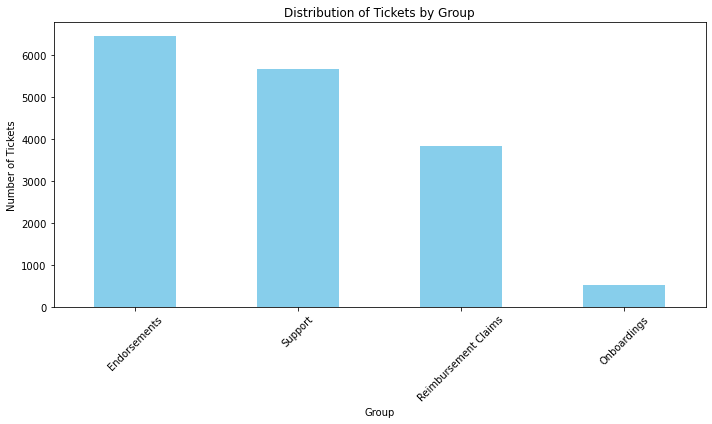

In [12]:

import matplotlib.pyplot as plt

# Count the occurrences of each group
group_counts = df['Group'].value_counts()

# Plot the distribution of groups using a bar plot
plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Tickets by Group')
plt.xlabel('Group')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 2. Can show this as a pie chart as well - %age contribution of each group - to the tickets

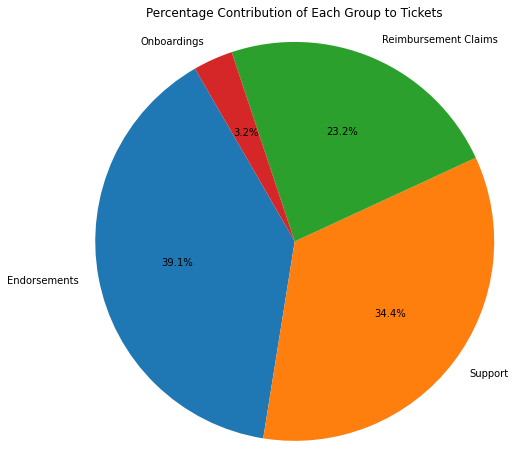

In [13]:

group_counts = df['Group'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Percentage Contribution of Each Group to Tickets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
# Calculate average resolution time for each group
avg_resolution_time = df.groupby('Group')['Resolution time'].mean().sort_values()

# Calculate average first resolution time for each group
avg_response_time = df.groupby('Group')['First resolution time in minutes'].mean().sort_values()

# Print average resolution time and average response time for each group
print("Average Resolution Time by Group:")
print(avg_resolution_time)

print("\nAverage Response Time by Group:")
print(avg_response_time)

Average Resolution Time by Group:
Group
Support                 113.584816
Endorsements            246.305926
Reimbursement Claims    249.072532
Onboardings             591.320334
Name: Resolution time, dtype: float64

Average Response Time by Group:
Group
Support                  4512.152056
Reimbursement Claims    10224.830071
Endorsements            14153.489459
Onboardings             32945.435356
Name: First resolution time in minutes, dtype: float64


### 3. Average resolution time per Group. [Correlation to Ticket Volume]

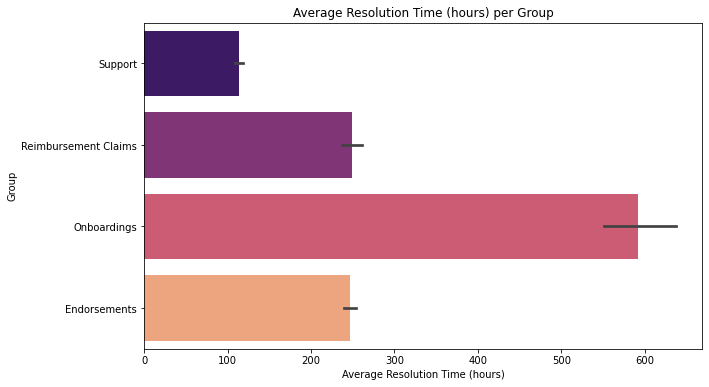

In [15]:
import seaborn as sns
# Plotting the Average Resolution Time in hours for each group
plt.figure(figsize=(10, 6))
sns.barplot(x='Resolution time', y='Group', data=df, palette='magma')
plt.title('Average Resolution Time (hours) per Group')
plt.xlabel('Average Resolution Time (hours)')
plt.ylabel('Group')
plt.show()

### Support Group: 
Despite handling a significant volume of tickets (as indicated by its large slice in the pie chart), this group has the lowest average resolution time. This suggests that the Support group is highly efficient, possibly due to streamlined processes, simpler issues, or effective resolution strategies.
    
### Onboardings Group: 
This group might handle fewer tickets(3.2%) compared to the Support group (34.4%), yet it has the highest average resolution time. This could indicate that tickets in the Onboardings category are more complex, require more steps to resolve, or involve longer wait times for information or approvals.

### Reimbursement Claims and Endorsements Groups: 
These groups have a moderate volume of tickets and resolution times. Their performance could be influenced by the nature of the tickets they handle, which might be more complex than those of the Support group but less so than those of the Onboardings group.
 
Groups with higher ticket volumes and lower resolution times are likely to have effective processes and training in place, enabling them to handle a large workload efficiently. **[Support team]**

Conversely, groups with longer resolution times might benefit from further investigation to identify bottlenecks or areas for process improvement, especially if they also handle a significant volume of tickets.

Organizations can use these insights to allocate resources effectively, prioritize process improvements, and tailor training programs to enhance efficiency.

Understanding these dynamics can also help in setting realistic expectations for resolution times based on the type of ticket and the group handling it.


# 4. Customer Satisfaction Score
#### CSAT is typically calculated as the percentage of satisfied customers (those who gave a rating above a certain threshold, often including the top two ratings if the scale is from 1 to 5 or similar) out of the total number of respondents.
#### The "Satisfaction Score" column contains values that include numerical ratings from 1 to 5 and the term "Offered", along with some missing values. To calculate the Customer Satisfaction Score (CSAT), we'll consider only the numerical ratings, assuming a score of 4 or 5 indicates satisfaction.

Exclude records with non-numerical ratings ("Offered") and missing values for the calculation. Calculate the percentage of responses with a score of 4 or 5 out of all numerical responses to get the CSAT. Visualize the distribution of satisfaction scores to provide a comprehensive view of customer feedback.

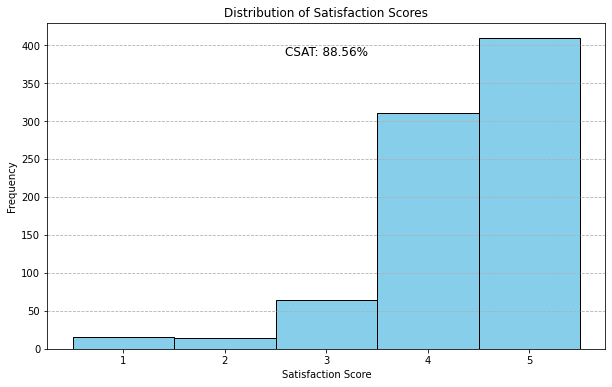

In [17]:

# Convert 'Satisfaction Score' to numeric, setting errors='coerce' to turn non-numeric values into NaN
df['Satisfaction Score Numeric'] = pd.to_numeric(df['Satisfaction Score'], errors='coerce')

# Filter out NaN values (which now include the original NaNs and the 'Offered' entries)
filtered_data = df.dropna(subset=['Satisfaction Score Numeric'])

# Calculate CSAT - percentage of responses with a score of 4 or 5
csat_score = (filtered_data['Satisfaction Score Numeric'] >= 4).mean() * 100

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Satisfaction Score Numeric'], bins=[1, 2, 3, 4, 5, 6], align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--')

# Indicate CSAT percentage on the plot
plt.text(3, max(plt.ylim())*0.9, f'CSAT: {csat_score:.2f}%', fontsize=12, ha='center')

plt.show()

The Customer Satisfaction Score (CSAT) for the provided data is approximately 88.56%. This means that 88.56% of the respondents who gave a numerical rating indicated a satisfaction score of 4 or 5, showing a high level of customer satisfaction.

## 5. Average Resolution time per group over 10 weeks of Data [Trend] with Ticket Volume

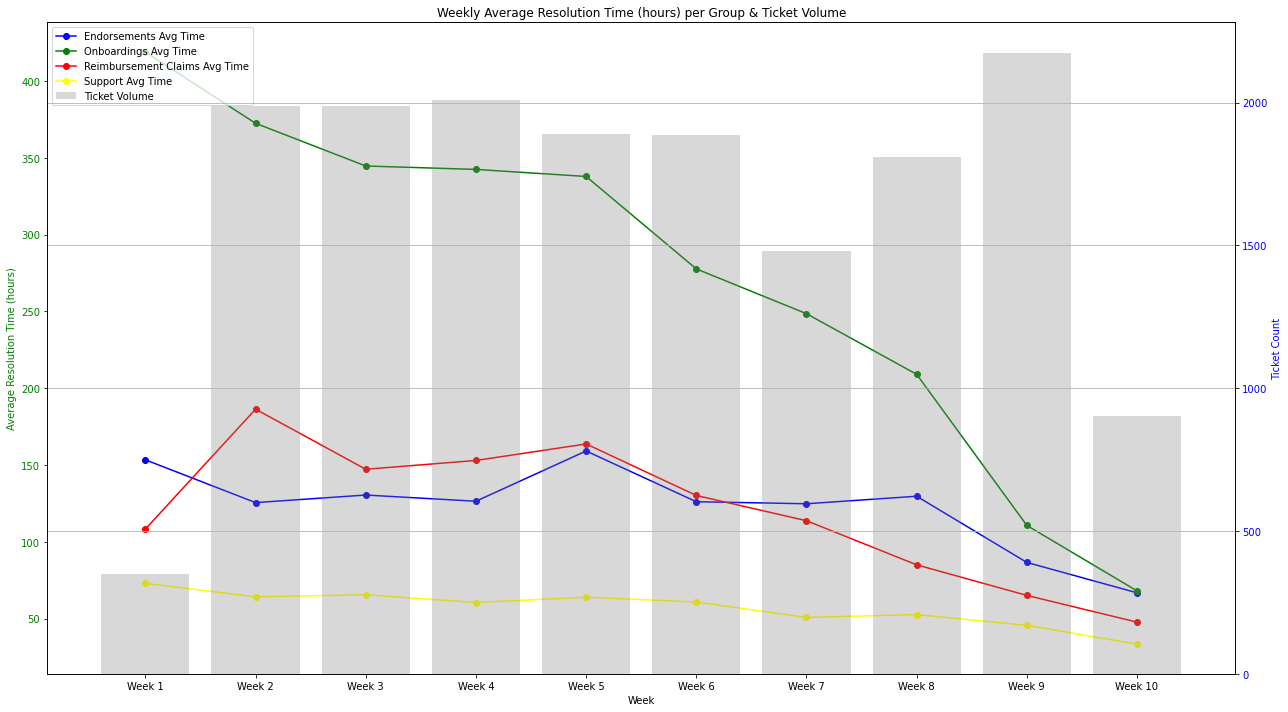

In [16]:

# Convert 'Created at' to datetime and extract week number
df['Created at'] = pd.to_datetime(df['Created at'], format='%d-%m-%Y %H:%M')
df['Week'] = df['Created at'].dt.to_period('W')

# Calculate the average resolution time per group per week
df['Average Resolution Time (hours)'] = df['Full resolution time in minutes within business hours'] / 60
weekly_avg_resolution = df.groupby(['Group', 'Week'])['Average Resolution Time (hours)'].mean().reset_index()

# Calculate the number of tickets per group per week
weekly_ticket_counts = df.groupby(['Group', 'Week']).size().reset_index(name='Ticket Count')

# Merge the weekly average resolution time data with the ticket counts
weekly_data_merged = pd.merge(weekly_avg_resolution, weekly_ticket_counts, on=['Group', 'Week'])

# Define color map for the groups
group_colors = {
    'Endorsements': 'blue',
    'Onboardings': 'green',
    'Reimbursement Claims': 'red',
    'Support': 'yellow'
}

# Reformat 'Week' to "Week 1", "Week 2", etc.
weekly_data_merged['Week Number'] = weekly_data_merged['Week'].apply(lambda x: f"Week {x.week - weekly_data_merged['Week'].min().week + 1}")

# Plotting
plt.figure(figsize=(18, 10))
ax1 = plt.gca()  # Primary axis for avg resolution time
ax2 = ax1.twinx()  # Secondary axis for ticket count

# Plot lines for each group's average resolution time with specified colors
for group in weekly_data_merged['Group'].unique():
    group_data = weekly_data_merged[weekly_data_merged['Group'] == group]
    ax1.plot(group_data['Week Number'], group_data['Average Resolution Time (hours)'], label=f'{group} Avg Time', color=group_colors[group], marker='o')

# Plot ticket volume as bars
weekly_total_tickets_by_week_number = weekly_data_merged.groupby('Week Number')['Ticket Count'].sum().reset_index()
ax2.bar(weekly_total_tickets_by_week_number['Week Number'], weekly_total_tickets_by_week_number['Ticket Count'], alpha=0.3, color='grey', label='Ticket Volume')

ax1.set_title('Weekly Average Resolution Time (hours) per Group & Ticket Volume')
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Resolution Time (hours)', color='g')
ax2.set_ylabel('Ticket Count', color='b')
ax1.tick_params(axis='y', labelcolor='g')
ax2.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=90)

# Creating combined legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

Observing the lines for each group, you can identify trends in how efficiently each group resolves tickets over time. A downward trend in resolution time suggests improving efficiency, while an upward trend might indicate growing challenges or increasing complexity in tickets.

By comparing the resolution times against the background of ticket volume (grey bars), you can infer the impact of workload on resolution efficiency. For instance, if resolution times increase during weeks with higher ticket volumes, this might suggest that workload impacts the groups' ability to resolve tickets promptly.




## 6. Analyzing tickets by priority (e.g., High, Medium, Low) and their corresponding resolution times can reveal if high-priority tickets are indeed being resolved faster and how priority affects resolution times.


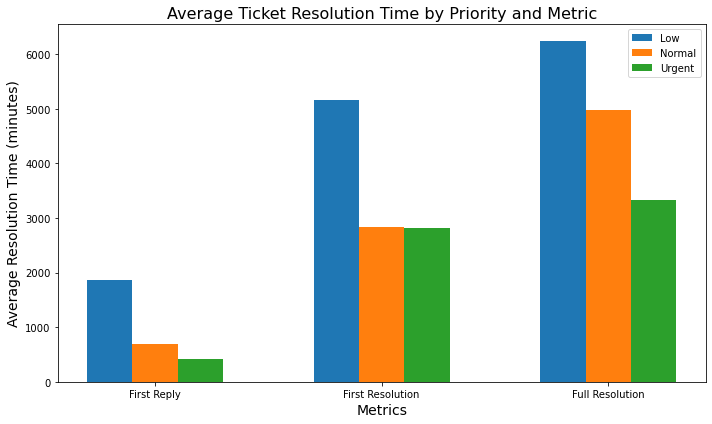

In [17]:

# Filter the needed columns
resolution_data = df[['Priority', 
                        'First reply time in minutes within business hours', 
                        'First resolution time in minutes within business hours',
                        'Full resolution time in minutes within business hours']]

# Calculate average resolution times by priority
avg_resolution_times = resolution_data.groupby('Priority').mean().reset_index()

avg_resolution_times

import numpy as np

# Set the categories and metrics for plotting
categories = ['First Reply', 'First Resolution', 'Full Resolution']
priorities = avg_resolution_times['Priority'].tolist()
data_to_plot = avg_resolution_times.iloc[:, 1:].values.T

# Set up the figure and axes for the clustered column chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(categories))

# Create bars for each priority
for i, priority in enumerate(priorities):
    bars = ax.bar(index + i * bar_width, data_to_plot[:, i], bar_width, label=priority)

# Add some final touches
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Average Resolution Time (minutes)', fontsize=14)
ax.set_title('Average Ticket Resolution Time by Priority and Metric', fontsize=16)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## 7. Group the data by 'Group' and calculating average 'Reopens' and 'Replies' for each group

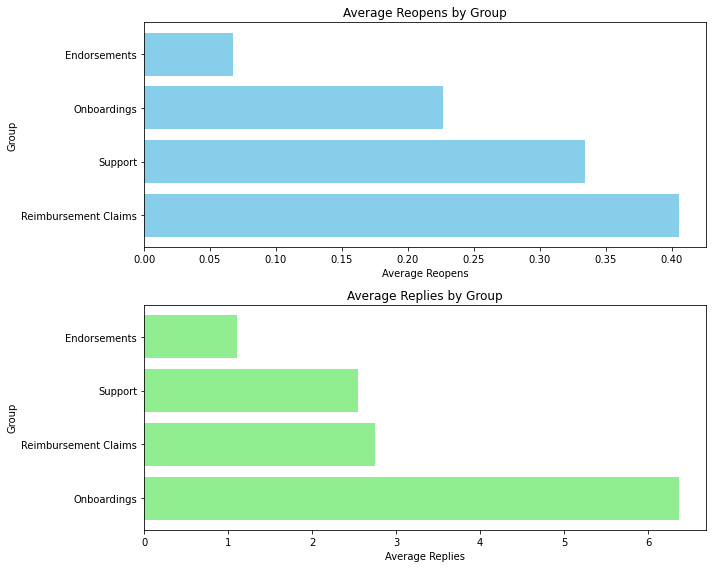

In [18]:

group_metrics = df.groupby('Group').agg({
    'Reopens': 'mean',
    'Replies': 'mean'
}).reset_index()

# Sort the groups by 'Reopens' and 'Replies' for better visualization
group_metrics_sorted_reopens = group_metrics.sort_values(by='Reopens', ascending=False)
group_metrics_sorted_replies = group_metrics.sort_values(by='Replies', ascending=False)

# Visualize the data
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Reopens
ax[0].barh(group_metrics_sorted_reopens['Group'], group_metrics_sorted_reopens['Reopens'], color='skyblue')
ax[0].set_title('Average Reopens by Group')
ax[0].set_xlabel('Average Reopens')
ax[0].set_ylabel('Group')

# Replies
ax[1].barh(group_metrics_sorted_replies['Group'], group_metrics_sorted_replies['Replies'], color='lightgreen')
ax[1].set_title('Average Replies by Group')
ax[1].set_xlabel('Average Replies')
ax[1].set_ylabel('Group')

plt.tight_layout()
plt.show()

## Support Group
The Support group, with more reopens but fewer average replies, indicates that while issues may not require extensive communication to attempt resolution, they often need multiple attempts to be fully resolved. This pattern suggests the initial solutions might not fully meet the users' needs or that issues are complex, requiring iterative approaches to find the right solution. Improving the initial diagnosis and resolution process could reduce these reopens.

## Onboarding Group
Conversely, the Onboarding group sees higher average replies but fewer reopens, indicating that while new users or clients need more information and guidance initially (reflected in the higher number of replies), the issues are generally resolved in fewer attempts. This suggests that the onboarding process might benefit from more comprehensive initial support or clearer documentation to reduce the need for extensive back-and-forth communication, thereby streamlining the onboarding experience.


## 8. Percentage of customers which rated vs Not rated even though they were offered

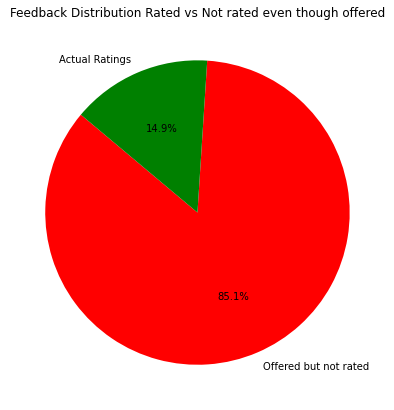

In [19]:
# Filter data for 'Closed' and 'Solved' status
closed_solved_tickets = df[df['Status'].isin(['Closed', 'Solved'])]

# Count 'Offered' feedback and actual ratings provided
offered_count = closed_solved_tickets['Satisfaction Score'].value_counts().get('Offered',0)
actual_ratings_count = closed_solved_tickets['Satisfaction Score'].isin(['1', '2', '3', '4', '5']).sum()

# Pie chart plotting
plt.figure(figsize=(7, 7))
plt.pie(
    [offered_count, actual_ratings_count],
    labels=['Offered but not rated', 'Actual Ratings'],
    colors=['red', 'green'],  # Red for offered but not rated, Green for actual ratings
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Feedback Distribution Rated vs Not rated even though offered')
plt.show()

1. Simplification of the Feedback Process Required

Reduce Friction: Ensure the process of leaving a satisfaction score is as simple and quick as possible. Consider using a one-click rating system directly in the email or notification.
    
2. Personalize the Request

Customization: Personalize the feedback request with the customer's name and details about the service they received to make them feel valued and understood.

3. Constructive Engagement
Engage Dissatisfied Customers: For customers who provide low satisfaction scores, follow up with them to understand their concerns and offer solutions, showing that their feedback leads to direct action.

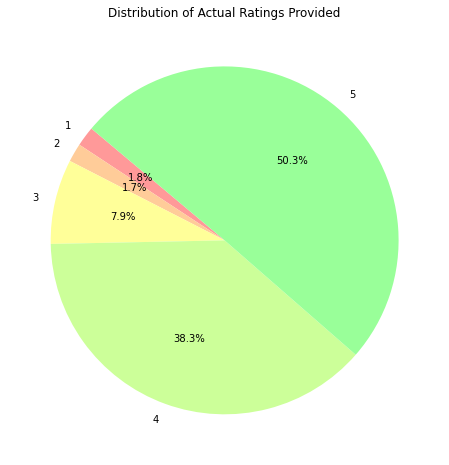

In [21]:
# Filter out tickets that provided actual numerical ratings (1-5)
actual_rated_tickets = closed_solved_tickets[closed_solved_tickets['Satisfaction Score'].isin(['1', '2', '3', '4', '5'])]

# Count of each rating
ratings_count = actual_rated_tickets['Satisfaction Score'].value_counts().sort_index()

# Plotting the pie chart for different ratings
plt.figure(figsize=(8, 8))
plt.pie(
    ratings_count,
    labels=ratings_count.index,
    colors=['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99'],  # Unique colors for each rating
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Actual Ratings Provided')
plt.show()


## 9. Difference between average First Resolution, Full Resolution And Customer Wait Times across Groups

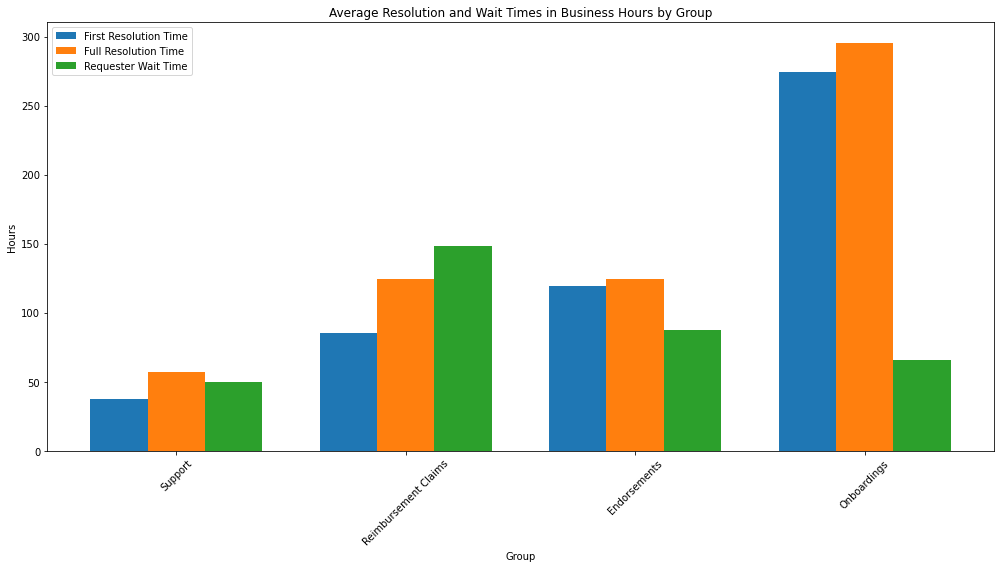

In [22]:

# Aggregate the data by 'Group' and calculate the mean for resolution times and wait time
grouped_data = df.groupby('Group').agg({
    'First resolution time in minutes within business hours': 'mean',
    'Full resolution time in minutes within business hours': 'mean',
    'Requester wait time in minutes within business hours': 'mean'
}).reset_index()

# Convert minutes to hours for clarity
grouped_data['First resolution time in minutes within business hours'] /= 60
grouped_data['Full resolution time in minutes within business hours'] /= 60
grouped_data['Requester wait time in minutes within business hours'] /= 60

# Sort the data for visualization
grouped_data.sort_values(by='First resolution time in minutes within business hours', inplace=True)

# Plotting
plt.figure(figsize=(14, 8))
bar_width = 0.25
index = range(len(grouped_data))

plt.bar(index, grouped_data['First resolution time in minutes within business hours'], bar_width, label='First Resolution Time')
plt.bar([p + bar_width for p in index], grouped_data['Full resolution time in minutes within business hours'], bar_width, label='Full Resolution Time')
plt.bar([p + 2*bar_width for p in index], grouped_data['Requester wait time in minutes within business hours'], bar_width, label='Requester Wait Time')

plt.xlabel('Group')
plt.ylabel('Hours')
plt.title('Average Resolution and Wait Times in Business Hours by Group')
plt.xticks([p + bar_width for p in index], grouped_data['Group'], rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

For each group, the difference between the average first resolution time and the average full resolution time within business hours highlights the variance in the complexity or processing efficiency of tasks:

Reimbursement Claims: This group shows a substantial difference, indicating that while initial responses are quick, the full resolution of cases is significantly more time-consuming, possibly due to the complexity of verifying claims and processing payments.
Support: The difference is moderate, suggesting a balanced approach to both initiating and fully resolving requests, which could reflect a mix of simple and complex issues.
Endorsements: Exhibits a smaller difference, implying that issues are generally less complex or that this group is highly efficient in resolving issues from start to finish.
    
Reimbursement Claims Stand Out: The Reimbursement Claims group has significantly higher requester wait times, suggesting complex verification processes or inefficiencies in handling claims.
Operational Efficiency Varies: Differences in resolution and wait times across groups indicate varying operational efficiencies, with some groups resolving issues faster than others.
Customer Satisfaction Risk: High requester wait times, especially in Reimbursement Claims, could negatively impact customer satisfaction by creating perceptions of slow service.
    